<center><h2> Module 3 Project</h2></center>
<center><h2> Data Loading & Cleaning</h2></center>



In terms of our dataset, we are combing data on the boroughs of London, together with air quality and pollent data, to advise potential homebuyers.

The borough related data contains 85 columns, including demographic data. However we are only keeping 19 columns, in particular these columns are related 

<h4>(1) potential drivers of air quality</h4>

- Population density (per hectare) 2016
- % of area that is Greenspace, 2005
- Total carbon emissions (2013)
- Number of cars, (2011 Census)

<h4>(2) factual info that potential homebuyers would be interested to know</h4>

- Unemployment rate (2015)
- Number of active businesses, 2014
- Crime rates per thousand population 2014/15
- Median House Price, 2014
- Average Band D Council Tax charge (£), 2015/16
- Rented from Local Authority or Housing Association, (2014) %
- Average Public Transport Accessibility score, 2014
- Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14
- Political control in council

<h4>(3) Survey data of residents</h4>

- Life satisfaction score 2011-14 (out of 10)
- Happiness score 2011-14 (out of 10)
- Anxiety score 2011-14 (out of 10)


In [2]:
%load_ext autoreload
%autoreload 2

In [16]:
import pandas as pd
import data_cleaning as dc
import api
import numpy as np
import statistics as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# RUN THIS ONLY ONCE, afterwards, read_csv
borough_data = dc.full_clean()
# borough_data = pd.read_csv('./data/borough_data_cleaned_coordi.csv',index_col=0)

In [5]:
# borough_data.head()

,code,area,inner_outer,population,unemployment,active_business,crime,house_price,council_tax,council_rental,greenspace,carbon_emmision,cars,pub_transport,achievement,life,happiness,anxiety,political,coordi
0,E09000001,City of London,Inner London,28.9,.,19250,.,765000,943,.,4.8,1417.5,1692,7.9,78.6,6.59,5.99,5.57,.,"[[51.513988, -0.104885]]"
1,E09000002,Barking and Dagenham,Outer London,57.3,11,5690,83.4,215000,1332,35.9,33.6,783.2,56966,3.0,58.0,7.14,7.05,3.05,Lab,"[[51.55903, 0.155831]]"
2,E09000003,Barnet,Outer London,44.5,8.5,24555,62.7,400000,1397,11.1,41.3,1552.7,144717,3.0,67.3,7.48,7.37,2.75,Cons,"[[51.658724, -0.190878]]"
3,E09000004,Bexley,Outer London,39.9,7.6,8430,51.8,250000,1446,15.2,31.7,1060.9,108507,2.6,60.3,7.38,7.21,3.29,Cons,"[[51.4589, 0.1384]]"
4,E09000005,Brent,Outer London,76.1,7.5,14680,78.8,385000,1354,20.4,21.9,1292.6,87802,3.7,60.1,7.25,7.22,2.92,Lab,"[[51.62028, 0.305]]"


In [12]:

# RUN THIS ONLY ONCE, afterwards, read_csv
# dc.aqi_data(borough_data, 24)
aqi = pd.read_csv('./data/borough_data_cleaned_aqi.csv',index_col=0)

# after reading the saved aqi data, turn it into a list and calcualte mean and average
aqi.aqi_24 = aqi.aqi_24.map(lambda x: [int(i) for i in x[1:-1].split(', ')])
aqi['aqi_mean'] = aqi.aqi_24.map(lambda x: np.asarray(x).mean())
aqi['aqi_med'] = aqi.aqi_24.map(lambda x: stats.median(x))

In [13]:
aqi.head(3)

,code,area,inner_outer,population,unemployment,active_business,crime,house_price,council_tax,council_rental,...,pub_transport,achievement,life,happiness,anxiety,political,coordi,aqi_24,aqi_mean,aqi_med
0,E09000001,City of London,Inner London,28.9,.,19250,.,765000,943,.,...,7.9,78.6,6.59,5.99,5.57,.,"[[51.513988, -0.104885]]","[69, 70, 65, 57, 76, 71, 74, 79, 78, 81, 81, 8...",74.666667,77.5
1,E09000002,Barking and Dagenham,Outer London,57.3,11,5690,83.4,215000,1332,35.9,...,3.0,58.0,7.14,7.05,3.05,Lab,"[[51.55903, 0.155831]]","[79, 75, 67, 72, 68, 74, 79, 78, 79, 85, 84, 8...",78.416667,79.0
2,E09000003,Barnet,Outer London,44.5,8.5,24555,62.7,400000,1397,11.1,...,3.0,67.3,7.48,7.37,2.75,Cons,"[[51.658724, -0.190878]]","[82, 83, 85, 89, 88, 89, 87, 87, 89, 87, 84, 8...",86.375000,87.0


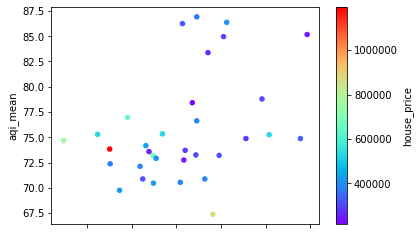

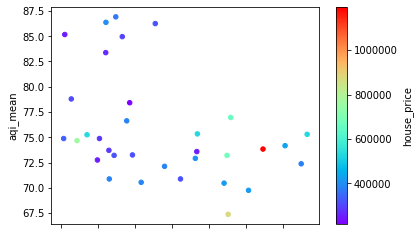

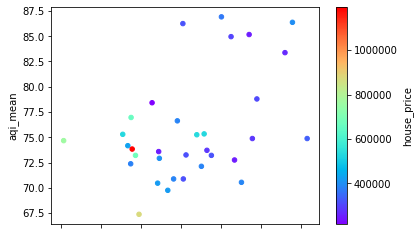

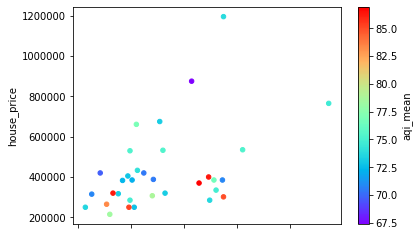

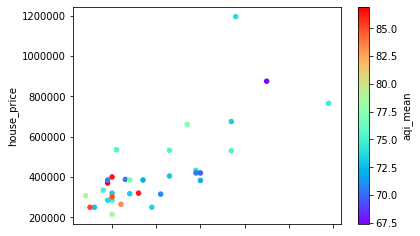

In [213]:
aqi.plot.scatter('greenspace', 'aqi_mean', c = 'house_price', colormap = 'rainbow')
aqi.plot.scatter('population', 'aqi_mean', c = 'house_price', colormap = 'rainbow')
aqi.plot.scatter('cars', 'aqi_mean', c = 'house_price', colormap = 'rainbow')

aqi.plot.scatter('achievement', 'house_price', c = 'aqi_mean', colormap = 'rainbow')
aqi.plot.scatter('pub_transport', 'house_price', c = 'aqi_mean', colormap = 'rainbow')
plt.show()



#### EDA on AQI and something else

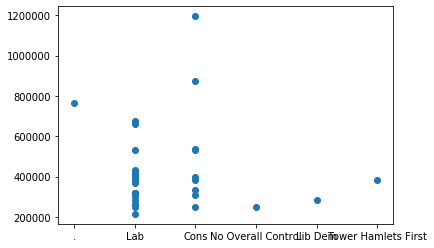

In [26]:
# plt.scatter(aqi.house_price, aqi.anxiety)
plt.scatter(aqi.political, aqi.house_price)

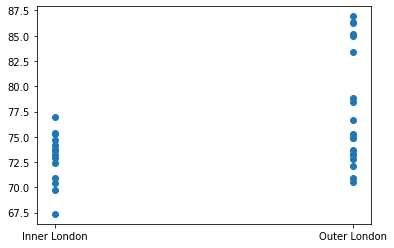

In [17]:
plt.scatter(aqi.inner_outer, aqi.aqi_mean)

#### Testing the API

In [5]:
import api

aqi_test = api.get_place_aqi(borough_data, 'Brent',3)
# df.to_csv('./data/borough_data_cleaned_aqi.csv')

In [7]:
print(len(aqi_test))
aqi_test

3


[63, 62, 57]

Story we're trying to tell:

Aimed at informing potential house buyers about air quality of diff boroughs, considering other demographic like median house price.

EDA - the more expensive houses seem to have better school grades achieved. However the better air quality places seem to be in the lower end of price.

Looking at air quality, seems to be more related to amount of greenspace. We use hypothesis to test if there is a real difference in air quality between most expensive vs. most affordable borough in London.

Inner london vs. outer london.

borough with most green space versus least greenspace.